# Criação dos modelos de Machine Learning

In [2]:
#!pip install plotnine

In [1]:
# Importando as bibliotecas
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from plotnine import *
from sklearn import metrics
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# Leitura do Dataset com as 9 colunas
df_usuario = pd.read_csv('C:\\Users\\05260536665\\Desktop\\TCC_RAFAEL\\02.Datasets\\BaseML.csv')

In [3]:
df_usuario.head()

,preco,frete,prestacoes,valor_pagamento,review_score,tps_pagamentos,Recencia,Frequencia,Receita
0,29.99,8.72,1.0,18.12,4,1,331,4,82.82
1,29.99,8.72,1.0,2.00,4,3,331,4,82.82
2,29.99,8.72,1.0,18.59,4,3,331,4,82.82
3,35.39,8.72,1.0,44.11,5,1,331,4,82.82
4,29.99,7.78,3.0,37.77,4,1,378,1,37.77


In [4]:
df_usuario.describe()

,preco,frete,prestacoes,valor_pagamento,review_score,tps_pagamentos,Recencia,Frequencia,Receita
count,114073.000000,114073.000000,114073.000000,114073.000000,114073.000000,114073.000000,114073.000000,114073.000000,114073.000000
mean,120.015780,20.010026,2.946447,172.142815,4.067106,0.926188,236.886126,1.818827,384.162920
std,182.403188,15.726486,2.781708,266.122915,1.357896,0.645107,152.516410,2.853186,1688.978567
min,0.850000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,9.590000
25%,39.900000,13.080000,1.000000,60.950000,4.000000,1.000000,113.000000,1.000000,70.600000
50%,74.900000,16.320000,2.000000,108.060000,5.000000,1.000000,217.000000,1.000000,134.600000
75%,133.000000,21.190000,4.000000,189.370000,5.000000,1.000000,345.000000,2.000000,282.850000
max,6735.000000,409.680000,24.000000,13664.080000,5.000000,3.000000,694.000000,75.000000,109312.640000


In [5]:
# Normalizando os dados
values = Normalizer().fit_transform(df_usuario.values)
print(values)

[[0.08739395 0.02541098 0.0029141  ... 0.96456816 0.01165641 0.24134603]
 [0.08751158 0.02544518 0.00291803 ... 0.96586634 0.0116721  0.24167085]
 [0.08738459 0.02540826 0.00291379 ... 0.96446475 0.01165516 0.24132015]
 ...
 [0.53464141 0.0603917  0.00133995 ... 0.04823832 0.00133995 0.59503311]
 [0.52170076 0.05722339 0.00948978 ... 0.23249966 0.00237245 0.57892415]
 [0.13564963 0.11193282 0.00875159 ... 0.91891683 0.00875159 0.24758245]]


# KMeans

In [36]:
# Realizando a clusterização. Definindo 5 clústeres inicialmente
kmeans = KMeans(n_clusters=5, n_init=10, max_iter=300)
y_pred = kmeans.fit_predict(values)

In [37]:
# Imprimindo o valor do coeficiente de Silhouette
labels = kmeans.labels_
silhouette = metrics.silhouette_score(values, labels, metric = 'euclidean')
print(silhouette)

0.4934475102069514


In [38]:
# Calculando o índice de Davies-Bouldin. 
dbs = metrics.davies_bouldin_score(values, labels)
print(dbs)

0.7506206860466504


In [39]:
# Indice Calinski-Harabasz (leva em consideração a dispersão dos pontos dentro de um cluster, tanto nos pontos dentro de um cluster específico, como entre clusters diferentes)
calisnki = metrics.calinski_harabasz_score(values, labels)
print(calisnki)

176657.22659418848


In [40]:
## Função para executar as métricas que a partir de um número de clústeres com entrada.
def clustering_algoritmos(n_clusters, dataset):
    kmeans = KMeans(n_clusters = n_clusters, n_init=10, max_iter=300)
    labels = kmeans.fit_predict(dataset)
    s = metrics.silhouette_score(dataset, labels, metric='euclidean')
    dbs = metrics.davies_bouldin_score(dataset, labels)
    calinski = metrics.calinski_harabasz_score(dataset, labels)
    return s, dbs, calinski

In [41]:
# Chamando a função clustering_algoritmos com diferentes números de cluster para análise das métricas.
s1, dbs1, calinski1 = clustering_algoritmos(3, values)
print(s1, dbs1, calinski1)

0.5238065618210775 0.7832601137516123 164393.7980038085


In [19]:
# Impressão das métricas para 5 clústeres
s2, dbs2, calinski2 = clustering_algoritmos(5, values)
print(s2, dbs2, calinski2)

0.493497985869912 0.7510483421511603 176657.2359457349


In [20]:
# Impressão das métricas para 7 clústeres
s3, dbs3, calinski3 = clustering_algoritmos(7, values)
print(s3, dbs3, calinski3)

0.4192121246152752 0.7984096445930031 179725.5934513398


In [21]:
# Impressão das métricas para 4 clústeres
s4, dbs4, calinski4 = clustering_algoritmos(4, values)
print(s4, dbs4, calinski4)

0.48010413042607625 0.7262786735024751 186562.24947639124


In [22]:
# Comparando os valores obtidos com um conjunto de dados aleatórios
random_data = np.random.rand(114073, 9)
s, dbs, calinski = clustering_algoritmos(4, random_data)
print(s, dbs, calinski)
print(s4, dbs4, calinski4)

0.07261551041736501 2.8162319698551643 8060.341380396318
0.48010413042607625 0.7262786735024751 186562.24947639124


In [23]:
# Validando a estabilidade do cluster
set1, set2, set3 = np.array_split(values, 3)
s1, dbs1, calinski1 = clustering_algoritmos(5, set1)
s2, dbs2, calinski2 = clustering_algoritmos(5, set2)
s3, dbs3, calinski3 = clustering_algoritmos(5, set3)
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)


0.4797409628789213 0.7509150535736937 59111.60951597359
0.44232490462463847 0.7786794020082619 58262.68697541739
0.45071914740797075 0.7586557529051633 63538.63002873932


<function matplotlib.pyplot.show(close=None, block=None)>

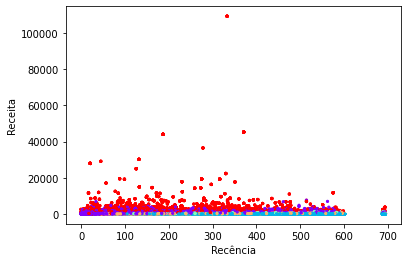

In [42]:
# Imprimindo um gráfico da receita x recência.
import matplotlib.pyplot as plt 
plt.scatter(df_usuario['Recencia'], df_usuario['Receita'], c=labels, s=5, cmap='rainbow')
plt.xlabel('Recência')
plt.ylabel('Receita')
plt.show

In [43]:
# Atribuindo um número a cada cluster
df_usuario['cluster'] = labels
df_usuario.head()

,preco,frete,prestacoes,valor_pagamento,review_score,tps_pagamentos,Recencia,Frequencia,Receita,cluster
0,29.99,8.72,1.0,18.12,4,1,331,4,82.82,1
1,29.99,8.72,1.0,2.00,4,3,331,4,82.82,1
2,29.99,8.72,1.0,18.59,4,3,331,4,82.82,1
3,35.39,8.72,1.0,44.11,5,1,331,4,82.82,1
4,29.99,7.78,3.0,37.77,4,1,378,1,37.77,1


In [44]:
# Algumas estatísticas descritivas dos atributos dos clústeres
df_usuario.groupby("cluster").describe()

preco                                                               \
           count        mean         std   min     25%    50%    75%      max   
cluster                                                                         
0        24065.0  258.056580  331.075309  2.20  89.900  150.0  295.0  6735.00   
1        38222.0   51.345201   32.789632  0.85  25.990   44.9   69.0   269.90   
2        10400.0   63.253839   43.475653  0.85  33.600   53.0   82.0   459.90   
3        26330.0  121.078167   75.102419  5.99  69.000  105.0  155.0   649.17   
4        15056.0  111.057658  135.103472  1.20  42.405   78.0  134.0  2589.00   

           frete             ... Frequencia        Receita               \
           count       mean  ...        75%   max    count         mean   
cluster                      ...                                          
0        24065.0  27.770765  ...        1.0  15.0  24065.0   289.508189   
1        38222.0  15.488317  ...        1.0  26.0  38222.0    77.263200   
2        10400.0  16.684799  ...        3.0  75.0  10400.0   359.452674   
3        26330.0  20.140814  ...        1.0  14.0  26330.0   142.588915   
4        15056.0  21.152779  ...        5.0  24.0  15056.0  1754.102964   

                                                                   
                 std    min       25%     50%      75%        max  
cluster                                                            
0         345.536350   9.59  111.6200  182.81   328.15    7571.63  
1          46.550394  10.07   43.2925   65.10    97.99     342.40  
2         191.913228  17.38  220.8750  314.60   449.60    1254.60  
3          79.531255  13.38   86.0200  126.64   181.68     671.31  
4        4375.949083   9.59  442.2800  782.16  1550.72  109312.64  

[5 rows x 72 columns]

In [45]:
# Verificando os centróides 
centroides = kmeans.cluster_centers_
print(centroides)

[[0.48969012 0.08765844 0.01117976 0.56095326 0.01826936 0.00393172
  0.24771538 0.00462108 0.58401025]
 [0.14408233 0.04838781 0.00635721 0.18485472 0.01360437 0.00309747
  0.9342145  0.00433035 0.21643828]
 [0.13294383 0.04026279 0.00714435 0.28586522 0.00955053 0.0024968
  0.59398139 0.00792339 0.71086216]
 [0.35702533 0.07435816 0.01017708 0.41614698 0.01751508 0.0038325
  0.68963256 0.0046961  0.43503527]
 [0.11398006 0.02806303 0.00484745 0.29220556 0.00598929 0.00147458
  0.16501153 0.00486673 0.91343584]]


In [46]:
## Iterando no valor máximo de atributos e imprimindo a variância
max = len(centroides[0])
for i in range(max):
    print(df_usuario.columns.values[i], "\n{:.4f}".format(centroides[:, i].var()))
    

preco 
0.0225
frete 
0.0005
prestacoes 
0.0000
valor_pagamento 
0.0167
review_score 
0.0000
tps_pagamentos 
0.0000
Recencia 
0.0812
Frequencia 
0.0000
Receita 
0.0562


In [47]:
# Descrição dos agrupamentos
description = df_usuario.groupby("cluster")['Receita', 'Recencia', 'Frequencia', 'preco', 'valor_pagamento']
n_clients = description.size()
description = description.mean()
description['n_clients'] = n_clients
print(description)

             Receita    Recencia  Frequencia       preco  valor_pagamento  \
cluster                                                                     
0         289.508189  104.983835    1.117432  258.056580       276.058648   
1          77.263200  343.043038    1.372456   51.345201        64.778013   
2         359.452674  289.318750    3.553173   63.253839       140.059961   
3         142.588915  226.714356    1.125598  121.078167       136.169847   
4        1754.102964  159.788789    4.087407  111.057658       363.680595   

         n_clients  
cluster             
0            24065  
1            38222  
2            10400  
3            26330  
4            15056  


In [54]:
description.head()

,Receita,Recencia,Frequencia,preco,valor_pagamento,n_clients
cluster,,,,,,
0,289.508189,104.983835,1.117432,258.056580,276.058648,24065
1,77.263200,343.043038,1.372456,51.345201,64.778013,38222
2,359.452674,289.318750,3.553173,63.253839,140.059961,10400
3,142.588915,226.714356,1.125598,121.078167,136.169847,26330
4,1754.102964,159.788789,4.087407,111.057658,363.680595,15056


# Selecionando os três atributos principais para comparação dos modelos

In [6]:
features = ['Recencia', 'Frequencia', 'Receita']

In [7]:
X = df_usuario[features]

In [8]:
X.head()

,Recencia,Frequencia,Receita
0,331,4,82.82
1,331,4,82.82
2,331,4,82.82
3,331,4,82.82
4,378,1,37.77


In [9]:
# Normalização dos dados
from sklearn.preprocessing import StandardScaler 
z = StandardScaler()
X[features] = z.fit_transform(X)

In [10]:
X.head()

,Recencia,Frequencia,Receita
0,0.617076,0.764473,-0.178418
1,0.617076,0.764473,-0.178418
2,0.617076,0.764473,-0.178418
3,0.617076,0.764473,-0.178418
4,0.925241,-0.286988,-0.205091


# Comparação de modelos de clusterização  

# I - Gaussian Mixture Model

In [111]:
# 01. Criação do modelo.
EM = GaussianMixture(n_components = 4)
EM.fit(X)

GaussianMixture(n_components=4)

In [112]:
cluster = EM.predict(X)

In [116]:
# Coeficiente de Silhouette
silhouette = metrics.silhouette_score(X, cluster, metric = 'euclidean')
print(silhouette)

0.5018633696665036


In [115]:
# Indice de Davies-Bouldin
dbs = metrics.davies_bouldin_score(X, cluster)
print(dbs)

1.3258140727201075


In [80]:
X['cluster'] = cluster

In [81]:
# Visualização dos clústeres
X.head()


,Recencia,Frequencia,Receita,cluster
0,0.617076,0.764473,-0.178418,0
1,0.617076,0.764473,-0.178418,0
2,0.617076,0.764473,-0.178418,0
3,0.617076,0.764473,-0.178418,0
4,0.925241,-0.286988,-0.205091,3


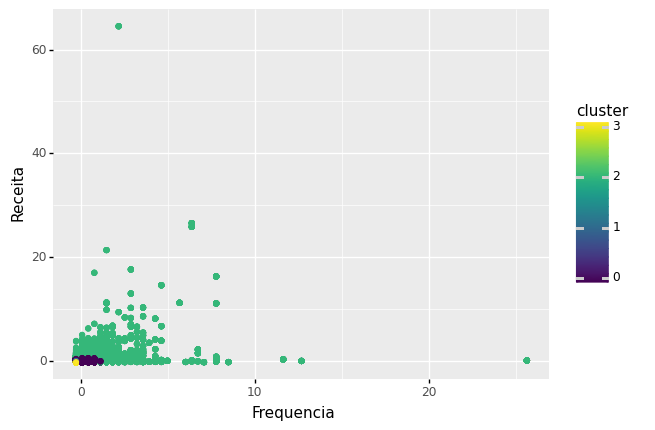

<ggplot: (-9223371874031513580)>

In [82]:
# Geração de gráficos dos agrupamentos (4 grupos)
(ggplot(X, aes(x = 'Frequencia', y='Receita', color='cluster')) + geom_point())


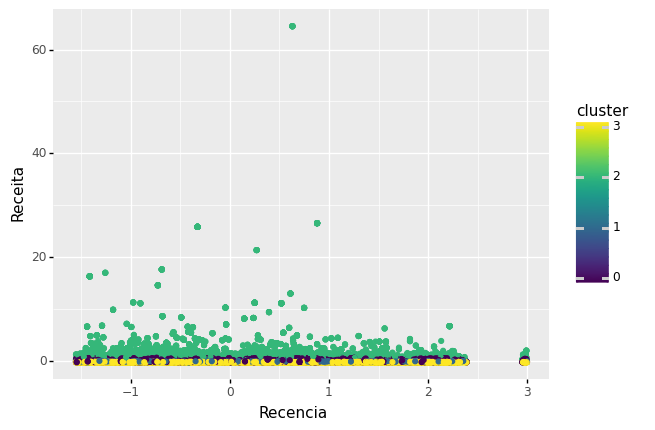

<ggplot: (-9223371874031517364)>

In [83]:
(ggplot(X, aes(x = 'Recencia', y='Receita', color='cluster')) + geom_point())

In [103]:
# Geração de gráficos dos agrupamentos (2 grupos)
EM = GaussianMixture(n_components = 2)
EM.fit(X)

GaussianMixture(n_components=2)

In [104]:
cluster = EM.predict(X)

In [105]:
X['cluster'] = cluster

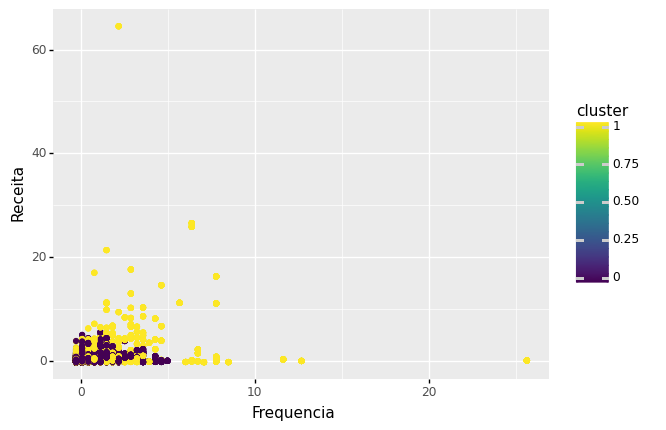

<ggplot: (-9223371874030734720)>

In [106]:
(ggplot(X, aes(x = 'Frequencia', y='Receita', color='cluster')) + geom_point())

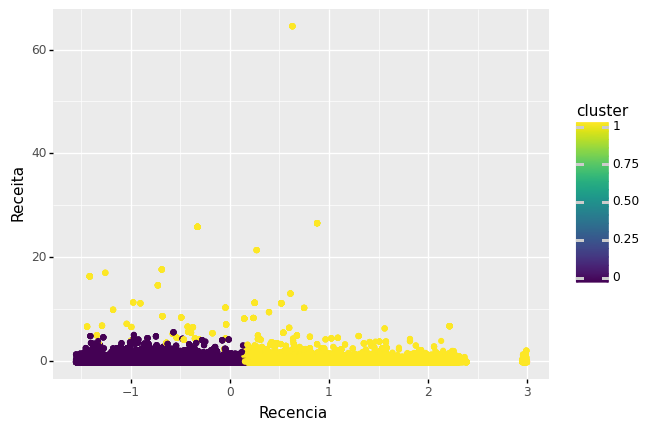

<ggplot: (-9223371874016703064)>

In [107]:
(ggplot(X, aes(x = 'Recencia', y='Receita', color='cluster')) + geom_point())

In [84]:
# Variando a faixa de clústeres
faixa_n_clusters = [i for i in range(2, 10)]
print(faixa_n_clusters)

[2, 3, 4, 5, 6, 7, 8, 9]


In [108]:
# Teste com faixa de clústeres para o Gaussian Model
valores_silhueta = []
for k in faixa_n_clusters:
    EM = GaussianMixture(n_components = k)
    EM.fit(X)
    cluster = EM.predict(X) 
    media_silhueta = silhouette_score(X, cluster)
    valores_silhueta.append(media_silhueta)
        

In [109]:
print(valores_silhueta)

[0.546958666933048, 0.5354687638746093, 0.5640610890209034, 0.3328405489087467, 0.29085211294602553, 0.1871337086582214, 0.28074479058358137, 0.1661666246914239]


In [110]:
# Gráfico dos valores médios de SILHOUETTE para o modelo de mistura guassiana
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x= faixa_n_clusters, y = valores_silhueta))
fig.update_layout(title= 'Valores de Silhouette Médios - Modelo de Mistura Gaussiana', xaxis_title='Número de clústeres', 
                 yaxis_title = 'Valor Médio de Silhouette')

# II - KMeans

In [122]:
# KMeans - 4 agrupamentos
agrupador = KMeans(n_clusters = 4)
agrupador.fit(X)

KMeans(n_clusters=4)

In [123]:
cluster = agrupador.predict(X)  

In [124]:
labels = kmeans.labels_

In [125]:
silhouette = metrics.silhouette_score(X, cluster, metric = 'euclidean')
print(silhouette)

0.5681924840757648


In [126]:
# Imprimindo as métricas (índice de Davies Bouldin e Calinksi)
dbs = metrics.davies_bouldin_score(X, cluster)
print(dbs)

0.7265127497958374


In [92]:
X['cluster'] = cluster

In [93]:
X.head()

,Recencia,Frequencia,Receita,cluster
0,0.617076,0.764473,-0.178418,1
1,0.617076,0.764473,-0.178418,1
2,0.617076,0.764473,-0.178418,1
3,0.617076,0.764473,-0.178418,1
4,0.925241,-0.286988,-0.205091,2


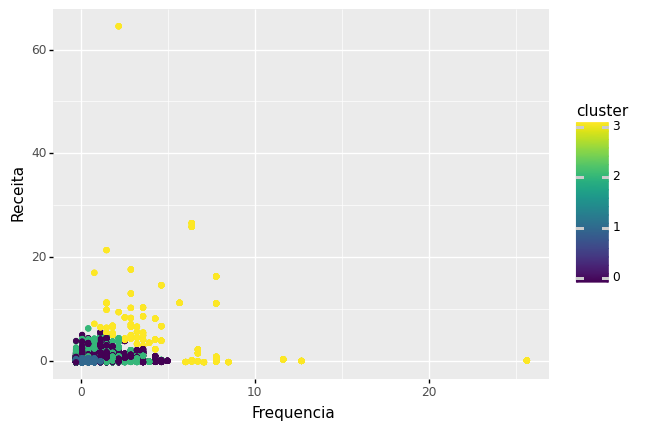

<ggplot: (-9223371874040186216)>

In [94]:
# Gráficos para KMeans - 4 clústeres
(ggplot(X, aes(x = 'Frequencia', y='Receita', color='cluster')) + geom_point())

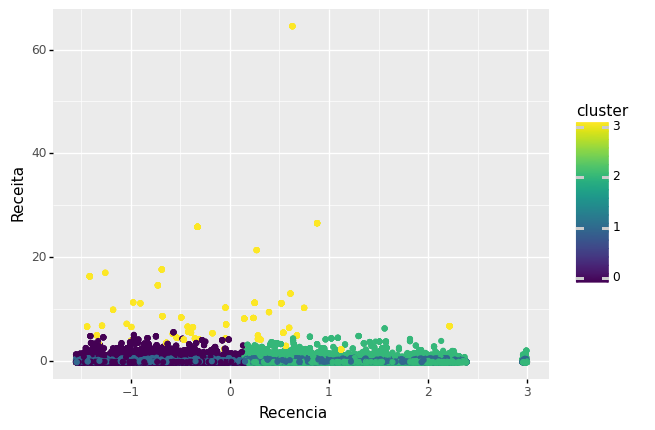

<ggplot: (-9223371874040191332)>

In [95]:
(ggplot(X, aes(x = 'Recencia', y='Receita', color='cluster')) + geom_point())

In [98]:
# KMeans - 4 agrupamentos
agrupador = KMeans(n_clusters = 2)
agrupador.fit(X)

KMeans(n_clusters=2)

In [99]:
cluster = agrupador.predict(X)

In [100]:
X['cluster'] = cluster

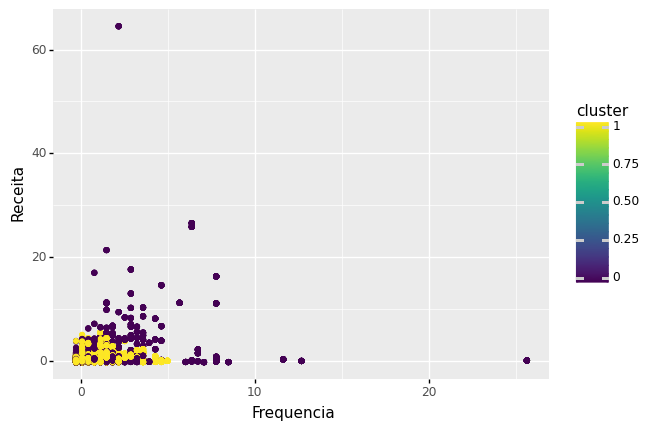

<ggplot: (-9223371874031490608)>

In [101]:
# Gráficos para KMeans - 2 clústeres
(ggplot(X, aes(x = 'Frequencia', y='Receita', color='cluster')) + geom_point())

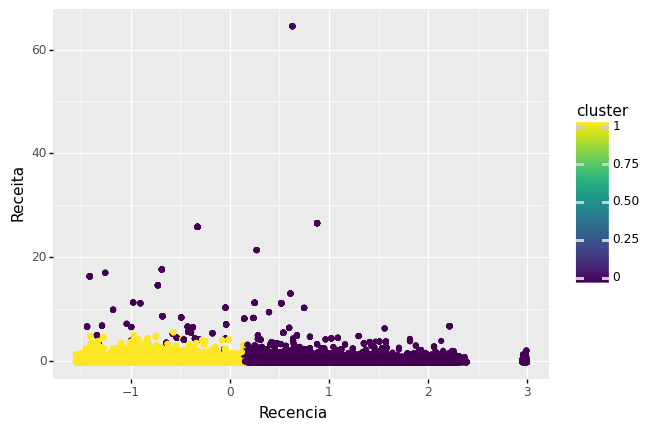

<ggplot: (-9223371874000234624)>

In [102]:
(ggplot(X, aes(x = 'Recencia', y='Receita', color='cluster')) + geom_point())

In [96]:
# Teste com faixa de clústeres para K-Means
valores_silhueta = []
for k in faixa_n_clusters:
    agrupador = KMeans(n_clusters = k)
    agrupador.fit(X)
    cluster = agrupador.predict(X) 
    media_silhueta = silhouette_score(X, cluster)
    valores_silhueta.append(media_silhueta)

In [ ]:
print(valores_silhueta)

In [97]:
# Gráfico dos valores médios de SILHOUETTE para K-means
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x= faixa_n_clusters, y = valores_silhueta))
fig.update_layout(title= 'Valores de Silhouette Médios - K-means', xaxis_title='Número de clústeres', 
                 yaxis_title = 'Valor Médio de Silhouette')